In [1]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Read and Examine Data

In [2]:
data = pd.read_csv("Titanic_train.csv",index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [6]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Visualisation

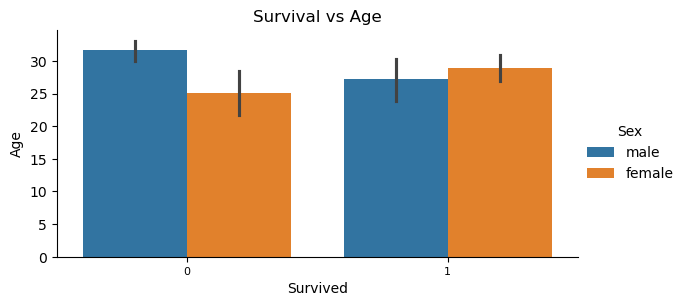

In [7]:
sns.catplot(data, x='Survived',
            y='Age', 
            kind = 'bar',
            height=3, 
            aspect=2,
            hue='Sex'
           )
plt.title('Survival vs Age')
plt.xticks(fontsize=8)
plt.show()

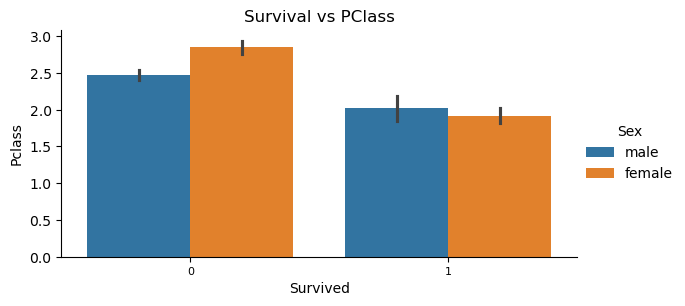

In [8]:
sns.catplot(data, x='Survived',
            y='Pclass', 
            kind = 'bar',
            height=3, 
            aspect=2,
            hue='Sex'
           )
plt.title('Survival vs PClass')
plt.xticks(fontsize=8)
plt.show()

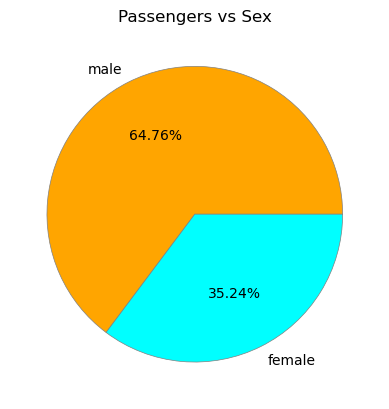

In [9]:
plt.title("Passengers vs Sex"),
plt.pie(data['Sex'].value_counts(),labels=['male','female'],
       autopct='%0.2f%%',
       textprops={'fontsize':10},
       wedgeprops={'edgecolor':'grey','linewidth':0.5},
    colors=['orange','cyan','grey']
       )
plt.show()

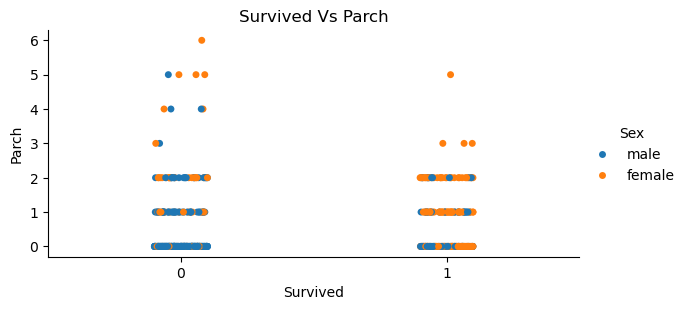

In [10]:
sns.catplot(
    data,
    x='Survived',
    y='Parch',
    kind='strip',
    height=3,
    aspect=2,
    hue='Sex'
)
plt.title("Survived Vs Parch")
plt.show()

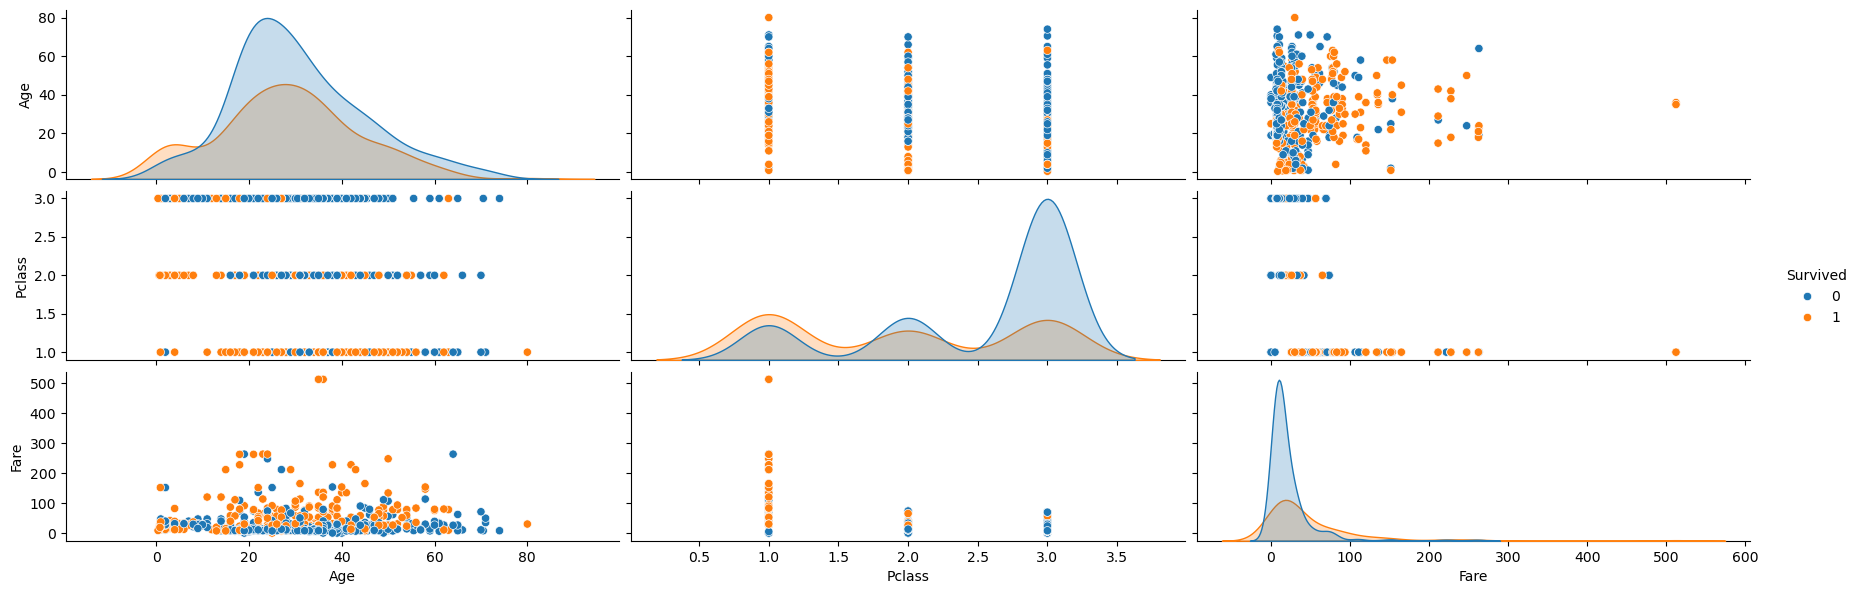

In [11]:
data_p=data[['Age','Pclass','Fare','Survived']]
sns.pairplot(data_p,hue='Survived',palette='tab10',height=2,aspect=3)
plt.show()

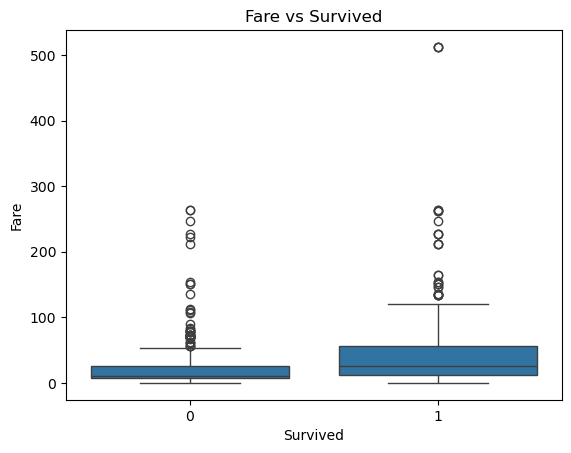

In [12]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare vs Survived')
plt.show()

### Data Preprocessing 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Given that the target variable is 'Survived', we can omit certain columns such as Ticket, Cabin, PassengerID, Name

#### Replace Null Values

In [14]:
mean_age=data['Age'].mean()
np.round(mean_age,0)

30.0

In [15]:
mode_embarked=data['Embarked'].mode()[0]
mode_embarked

'S'

In [16]:
data.fillna(
    {
        'Age':mean_age,
        'Embarked':mode_embarked
    },inplace=True
)

In [17]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


### Data Encode

In [18]:
data= pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,True,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,False,False,False
3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,False,False,True
5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,True,False,True
888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,False,False,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,False,False,True


In [19]:
X= data[['Pclass','Age','SibSp','Parch','Embarked_Q','Embarked_S','Sex_male']]
Y=data['Survived']

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,stratify=Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((596, 7), (295, 7), (596,), (295,))

### XGBoost

In [21]:
!pip install lightgbm

In [22]:
import xgboost as xgb
import lightgbm as lgb

In [23]:
model_xgb=xgb.XGBClassifier()
model_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [25]:
yhat=model_xgb.predict(X_test)
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       182
           1       0.74      0.62      0.68       113

    accuracy                           0.77       295
   macro avg       0.77      0.74      0.75       295
weighted avg       0.77      0.77      0.77       295



### Hyperparameter Tuning using GridSearchCV

In [26]:
pgrid = {
    'n_estimators': [50,60,100, 200,300, 500],
    'learning_rate': [0.1,0.3,0.4, 0.05, 0.1],
    'max_depth': [3,6,4 ,5, 7],
    'max_leaves':[2,3,4],
    'gamma': [0.1, 0.3]
}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
model=xgb.XGBRFClassifier()
grid=GridSearchCV(model,param_grid=pgrid,cv=5)
grid.fit(X_train,Y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       feature_weights=None, gamma=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_c...
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, ...),
             param_grid={'gamma': [0.1, 0.3],
                         'learning_rate': [0.1, 0.3, 0.4, 0.05, 0.1],
                         'max_depth': [3, 6, 4, 5, 7], 'max_leaves': [2, 3, 4],
                         'n_estimators': [50, 60, 100, 200, 300, 500]})

In [29]:
grid.best_params_

{'gamma': 0.1,
 'learning_rate': 0.4,
 'max_depth': 3,
 'max_leaves': 4,
 'n_estimators': 60}

In [30]:
grid.best_score_

0.7851820728291317

In [31]:
Xmodel=grid.best_estimator_

In [32]:
predicted_train=Xmodel.predict(X_test)
print(classification_report(Y_test,predicted_train))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       182
           1       0.97      0.50      0.66       113

    accuracy                           0.80       295
   macro avg       0.86      0.75      0.76       295
weighted avg       0.84      0.80      0.79       295



### Interpretation

### LGBM

In [33]:
import lightgbm as lgb

In [34]:
model_lgb=lgb.LGBMClassifier(verbose=-1,max_depth=8)
model_lgb.fit(X_train,Y_train)

LGBMClassifier(max_depth=8, verbose=-1)

In [35]:
yhat_lgb=model_lgb.predict(X_test)
print(classification_report(Y_test,yhat_lgb))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       182
           1       0.79      0.64      0.71       113

    accuracy                           0.80       295
   macro avg       0.80      0.77      0.78       295
weighted avg       0.80      0.80      0.79       295



### Hyperparameter Tuning- GridSearchCV

In [36]:
param_grid_lgbm = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 5, 10],
    'num_leaves': [15, 31, 63],
}

In [37]:
model_LGB=lgb.LGBMClassifier(verbose=-1)
grid_two=GridSearchCV(model_LGB,param_grid=param_grid_lgbm,cv=10)
grid_two.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LGBMClassifier(verbose=-1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [100, 300, 500],
                         'num_leaves': [15, 31, 63]})

In [38]:
grid_two.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}

In [39]:
grid_two.best_score_

0.8235875706214688

In [40]:
Lmodel=grid_two.best_estimator_

In [41]:
predicted=Lmodel.predict(X_test)
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       182
           1       0.84      0.65      0.74       113

    accuracy                           0.82       295
   macro avg       0.83      0.79      0.80       295
weighted avg       0.82      0.82      0.81       295



### Comparitive Analysis

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       182
           1       0.97      0.50      0.66       113

    accuracy                           0.80       295
   macro avg       0.86      0.75      0.76       295
weighted avg       0.84      0.80      0.79       295



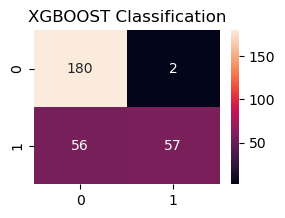

In [44]:
plt.figure(figsize=(3,2))
plt.title("XGBOOST Classification")
cm = confusion_matrix(Y_test, predicted_train)
print(classification_report(Y_test, predicted_train))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       182
           1       0.84      0.65      0.74       113

    accuracy                           0.82       295
   macro avg       0.83      0.79      0.80       295
weighted avg       0.82      0.82      0.81       295



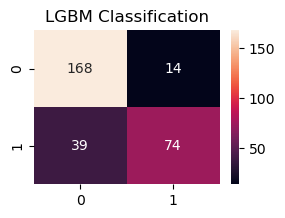

In [45]:
plt.figure(figsize=(3,2))
plt.title("LGBM Classification")
cm = confusion_matrix(Y_test, predicted)
print(classification_report(Y_test, predicted))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

**XGBoost** performed exceptionally on the majority class (Class 0) with a recall of 0.99 and an F1-score of 0.86, indicating it captured nearly all actual instances. However, it struggled with the minority class (Class 1), achieving only 0.50 recall despite high precision at 0.97, resulting in a lower F1-score of 0.66. The overall accuracy was 80%, but the model displayed clear bias toward the majority class, indicating a need for improvements in handling class imbalance and improving minority class recall.

**LGBM**, on the other hand, showed a more balanced performance between both classes. Class 0 maintained strong metrics with 0.92 recall and 0.86 F1-score, while Class 1 significantly improved in recall (0.65) and had high precision (0.84), resulting in an F1-score of 0.74. The overall accuracy increased to 82%, and the macro average scores indicate better generalization across classes. This suggests LGBM is currently outperforming XGBoost in achieving a more balanced classification.

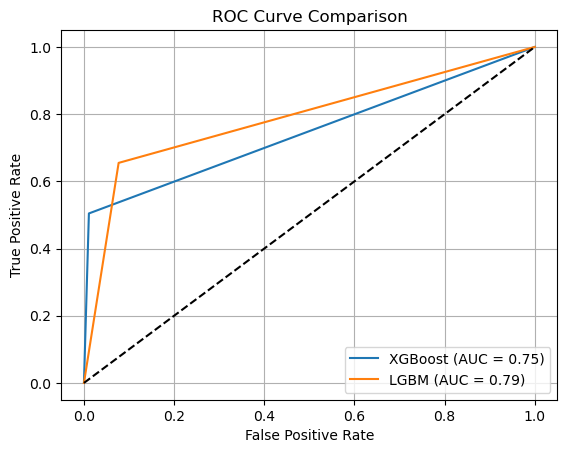

In [46]:
fprx,tprx,threshx=roc_curve(Y_test,predicted_train)
aucx=roc_auc_score(Y_test,predicted_train)
fprl,tprl,threshl=roc_curve(Y_test,predicted)
aucl=roc_auc_score(Y_test,predicted)


plt.figure()
plt.plot(fprx, tprx, label=f"XGBoost (AUC = {aucx:.2f})")
plt.plot(fprl, tprl, label=f"LGBM (AUC = {aucl:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()


The ROC curve shows that **LGBM (AUC = 0.79)** performs better than **XGBoost (AUC = 0.75)** in distinguishing between the two classes. LGBM maintains a higher true positive rate at most false positive rates, indicating better model discrimination and more reliable performance, especially for handling minority class predictions effectively.

### Test Data

In [81]:
test_data= pd.read_csv("Titanic_test.csv",index_col='PassengerId')
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
mean_age=test_data['Age'].mean()
np.round(mean_age,0)

30.0

In [83]:
mode_embarked=test_data['Embarked'].mode()[0]
mode_embarked

'S'

In [84]:
test_data.fillna(
    {
        'Age':mean_age,
        'Embarked':mode_embarked
    },inplace=True
)

In [85]:
test_data= pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [86]:
test_X = test_data[['Pclass','Age','SibSp','Parch','Embarked_Q','Embarked_S','Sex_male']]

In [87]:
test_X

,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,
892,3,34.50000,0,0,True,False,True
893,3,47.00000,1,0,False,True,False
894,2,62.00000,0,0,True,False,True
895,3,27.00000,0,0,False,True,True
896,3,22.00000,1,1,False,True,False
...,...,...,...,...,...,...,...
1305,3,30.27259,0,0,False,True,True
1306,1,39.00000,0,0,False,False,False
1307,3,38.50000,0,0,False,True,True


### XGB Test Data

In [88]:
test_xgb=Xmodel.predict(test_X)
test_data['XGB_Pred']=test_xgb
test_data

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,XGB_Pred
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,True,True,False,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,False,False,True,0
894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,True,True,False,0
895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,True,False,True,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,True,False,True,0
1306,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,False,False,False,1
1307,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,True,False,True,0


### LGBM on Test Data

In [89]:
test_lgb=Lmodel.predict(test_X)
test_data['LGBM_Pred']=test_lgb
test_data

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,XGB_Pred,LGBM_Pred
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,True,True,False,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,False,False,True,0,0
894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,True,True,False,0,0
895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,True,False,True,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,False,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,True,False,True,0,0
1306,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,False,False,False,1,1
1307,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,True,False,True,0,0


### Since the Test Dataset has no label and is completely different from train dataset, it is not possible to find the classification report or conclude an evaluation of XGB and LGBM models on this dataset